<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab1h/blob/main/IV_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lab1h Instant velocity experiment

In [92]:
!pip install uncertainties

In [79]:
from uncertainties import ufloat
from uncertainties.umath import *
import numpy as np
import matplotlib.pyplot as plt




## Expected acceleration and friction coefficeny

$$
a = g \frac{h}{L}
$$

$$
\mu  = \frac{a_{up} - a_{down}}{2 g}
$$

In [93]:
L = ufloat(1265, 1)*1e-3 #mm
l = ufloat(125, 1)*1e-3 #mm
h = ufloat(14.5, .1)* 1e-3 #mm
g = ufloat(9.7949, 1e-4)

a_expected = g*h/L
print(f'Expected acceleration: {a_expected*1e3} mm/s2')

Expected acceleration: 112.3+/-0.8 mm/s2


## measured time and velocity

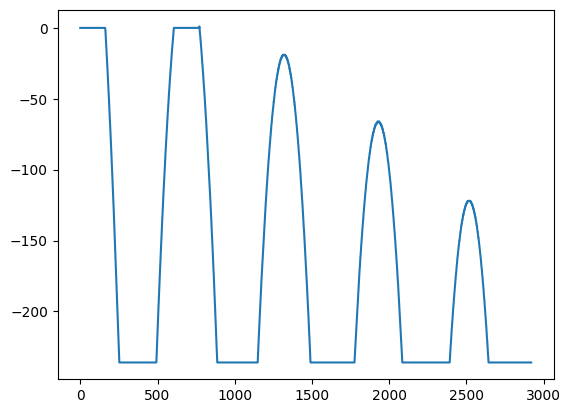

In [122]:
N = 236
t_, count = np.genfromtxt('data.txt', delimiter='\t', usecols=[1,3], unpack=True)
plt.plot(count)
plt.show()

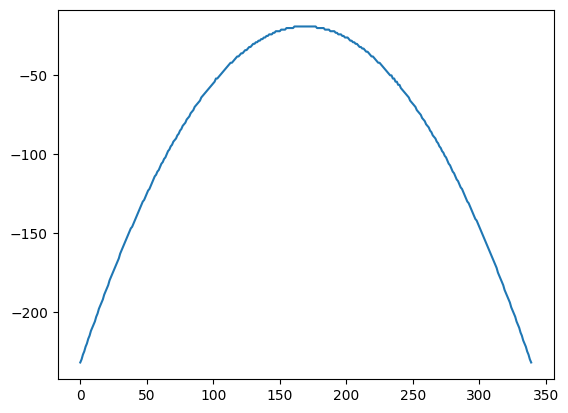

In [123]:
ix0 = 1150
ix1 = 1490
plt.plot(count[ix0:ix1])


Acceleration - parabolic fit: -78.707+/-0.026 mm/s2
Acceleration - upwards      : -78.68+/-0.12 mm/s2
Acceleration - downwards    : -77.25+/-0.12 mm/s2
Friction coeff    : (-7.3+/-0.8)e-05 mm/s2


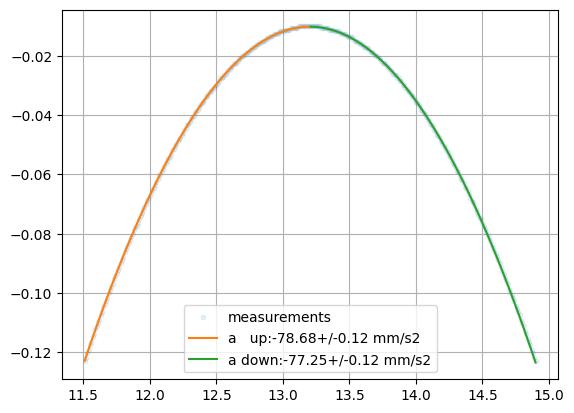

In [129]:
def get_acceleration(t, x):
  p, cov = np.polyfit(t, x, 2, cov=True)
  poly = np.poly1d(p)
  err = np.sqrt(np.diag(cov))
  return 2* ufloat(p[0], err[0]), poly


t = t_[ix0:ix1]
x = count[ix0:ix1] / N * l.n
plt.plot(t, x, '.', alpha=0.1, label='measurements')

a, poly = get_acceleration(t, x)
v0 = poly.coeffs[1]
t_vertex = - v0 / a.nominal_value

a_up, poly_ap = get_acceleration(t[t<t_vertex], x[t<t_vertex])
a_down, poly_down = get_acceleration(t[t>t_vertex], x[t>t_vertex])
mu = (a_up - a_down) / (2*g)
print(f'Acceleration - parabolic fit: {a*1e3} mm/s2')
print(f'Acceleration - upwards      : {a_up*1e3} mm/s2')
print(f'Acceleration - downwards    : {a_down*1e3} mm/s2')
print(f'Friction coeff    : {mu} mm/s2')
plt.plot(t[t<t_vertex], poly(t[t<t_vertex]), label=f'a   up:{a_up*1e3} mm/s2')
plt.plot(t[t>t_vertex], poly(t[t>t_vertex]), label=f'a down:{a_down*1e3} mm/s2')
plt.legend()
plt.grid()
plt.show()

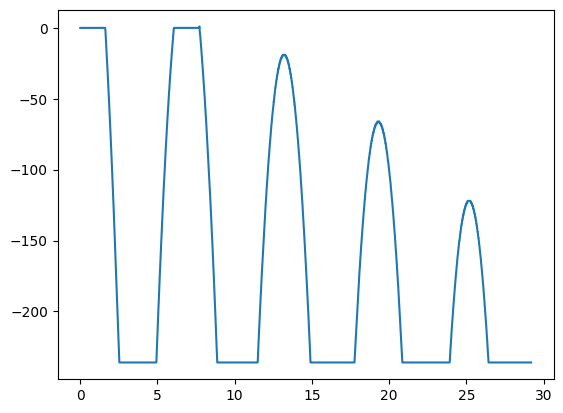

In [121]:
plt.plot(t, x)